In [78]:
from random import randint, choice
import matplotlib.pyplot as plt
import numpy as np

## 4b: Heuristic Approach

In [79]:
k = 100

for n in range(1, 15):
    m = n
    all_sizes = 0
    all_times = 0
    no_solution = 0
    # Performs 100 iterations for a specific n and m 
    for i in range(0, k):
        # Starts timer
        start = time.time()
        
        # Creating random matrix for every iterations
        matrix = []
        for i in range(m):
            row = []
            for i in range(n):
                number = randint(0, 1)
                row.append(number)
            matrix.append(row)

        # Find genome with highest number of reads
        max = 0
        index_matrix = []
        for i in range(len(matrix)):
            if matrix[i].count(1) > max:
                max = matrix[i].count(1)
                genome_index = i
            
            index = []
            for pos in range(len(matrix[i])):
                if(matrix[i][pos] == 1):
                    index.append(pos)
            index_matrix.append(index)    
        # If all rows have no reads
        if max == 0:
            no_solution += 1
            end = time.time()
            all_times += (end-start)

        # Determines which reads are missing
        ideal = []
        for i in range(m):
            ideal.append(i)
        missing = [x for x in ideal if x not in index_matrix[genome_index]]  
        
        # Iterates until all reads are found
        solution = []
        solution.append(genome_index)
        for i in range(len(index_matrix)):
            for j in index_matrix[i]:
                if j in missing:
                    missing.remove(j)
                    solution.append(i)
        
        # No solution found
        if missing != []:
            no_solution += 1
            end = time.time()
            all_times += (end-start)
        else:

            all_sizes += len(solution)
            end = time.time()
            all_times += (end-start)

    avg_size = all_sizes/(k-no_solution)
    avg_time = all_times/(k-no_solution)
    print("m/n Size:", i+1, "Average Size: ", avg_size, "Average Time: ", avg_time)

m/n Size: 1 Average Size:  -12.0 Average Time:  -0.00020599365234375
m/n Size: 2 Average Size:  1.309090909090909 Average Time:  2.1652741865678266e-05
m/n Size: 3 Average Size:  1.6 Average Time:  2.8872489929199217e-05
m/n Size: 4 Average Size:  1.7435897435897436 Average Time:  3.345807393391927e-05
m/n Size: 5 Average Size:  2.057471264367816 Average Time:  4.3038664192988956e-05
m/n Size: 6 Average Size:  2.5 Average Time:  5.203226338262143e-05
m/n Size: 7 Average Size:  2.7578947368421054 Average Time:  6.389366952996505e-05
m/n Size: 8 Average Size:  2.917525773195876 Average Time:  7.494946116024686e-05
m/n Size: 9 Average Size:  3.28 Average Time:  8.493900299072265e-05
m/n Size: 10 Average Size:  3.67 Average Time:  0.00010113954544067382
m/n Size: 11 Average Size:  3.8484848484848486 Average Time:  0.00011901662807271938
m/n Size: 12 Average Size:  4.2 Average Time:  0.00013470172882080079
m/n Size: 13 Average Size:  4.494949494949495 Average Time:  0.0001586711767948035
m/

## 4c. Brute Force Approach

In [80]:
k = 100

for n in range(1, 15):
    m = n
    # Performs 100 iterations for a specific n and m 
    all_sizes = 0
    all_times = 0
    no_solution = 0
    for i in range(0, k):
        # Starts timer
        start = time.time()
        
        # Creating random matrix for every iterations
        matrix = []
        for i in range(m):
            row = []
            for i in range(n):
                number = randint(0, 1)
                row.append(number)
            matrix.append(row)

        # Creating all possible combinations 
        genomes = []
        for i in range(m):
            genomes.append(i)
        combinations = []
        for i in range(1 << (len(genomes))):
            mini = []
            for j in range(len(genomes)):
                if (i & (1 << j)) != 0:
                    mini.append(genomes[j])
                if mini != []:
                    combinations.append(mini)
        combinations = list(set(tuple(sorted(sub)) for sub in combinations))

        # Finding all Possible Solutions
        solutions = []
        for combo in combinations: 
            # Retrieves each genome's reads
            data = []
            for g in combo:
                data.append(matrix[g])
            # Determines if combination of genomes satisfies
            count = 0
            for i in range(m):
                for g in data:
                    if g[i] == 1:
                        count += 1 
                        break
            if count == m:
                solutions.append(combo)
        
        # Finds the sizes
        if len(solutions) != 0:
            solutions.sort(key = len)
            all_sizes += len(solutions[0])
        else:
            no_solution += 1

        # Ends Timer
        end = time.time()
        total = end-start
        all_times += total
        
    avg_size = all_sizes/(k-no_solution)
    avg_time = all_times/(k-no_solution)
    print("m/n Size:", i+1, "Average Size: ", avg_size, "Average Time: ", avg_time)

m/n Size: 1 Average Size:  1.0 Average Time:  0.0007246555166041598
m/n Size: 2 Average Size:  1.1612903225806452 Average Time:  2.148459034581338e-05
m/n Size: 3 Average Size:  1.4303797468354431 Average Time:  3.322166732594937e-05
m/n Size: 4 Average Size:  1.7272727272727273 Average Time:  7.785450328480114e-05
m/n Size: 5 Average Size:  1.9325842696629214 Average Time:  0.0001571365956510051
m/n Size: 6 Average Size:  2.120879120879121 Average Time:  0.0003462283165900262
m/n Size: 7 Average Size:  2.051546391752577 Average Time:  0.0007322276990438245
m/n Size: 8 Average Size:  2.2421052631578946 Average Time:  0.0017551924052991365
m/n Size: 9 Average Size:  2.142857142857143 Average Time:  0.003639812372168716
m/n Size: 10 Average Size:  2.2525252525252526 Average Time:  0.008052320191354462
m/n Size: 11 Average Size:  2.18 Average Time:  0.017487504482269288
m/n Size: 12 Average Size:  2.25 Average Time:  0.04093581438064575
m/n Size: 13 Average Size:  2.34 Average Time:  0.08

## 4d. Plotting 

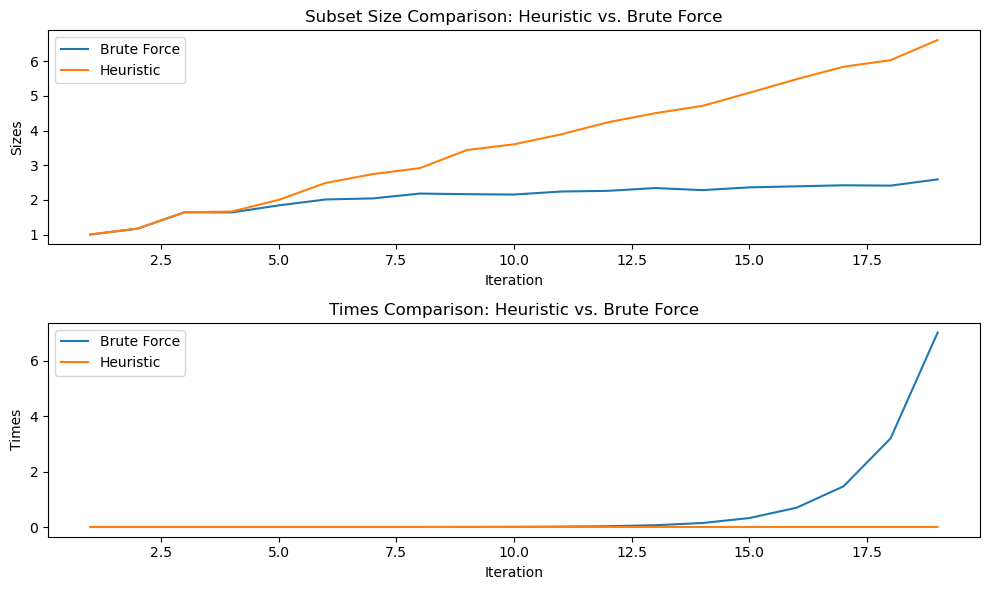

In [83]:
# Creates random matrix
def CreateMatrix(m, n):
    matrix = []
    for i in range(m):
        row = []
        for i in range(n):
            number = randint(0, 1)
            row.append(number)
        matrix.append(row)
    return matrix

# Runs the Heuristic and returns the size, time, and number of failures
def HeuristicSetCover(m, n, matrix):
    # Find genome with highest number of reads
    max = 0
    index_matrix = []
    for i in range(len(matrix)):
        if matrix[i].count(1) > max:
            max = matrix[i].count(1)
            genome_index = i
        
        index = []
        for pos in range(len(matrix[i])):
            if(matrix[i][pos] == 1):
                index.append(pos)
        index_matrix.append(index)    
    
    # If all rows have no reads
    if max == 0:
        no_solution = 1
        end_time = time.time()
        return 0, end_time, no_solution

    # Determines which reads are missing
    ideal = []
    for i in range(m):
        ideal.append(i)
    missing = [x for x in ideal if x not in index_matrix[genome_index]]  
    
    # Iterates until all reads are found
    solution = []
    solution.append(genome_index)
    for i in range(len(index_matrix)):
        for j in index_matrix[i]:
            if j in missing:
                missing.remove(j)
                solution.append(i)
    
    # No solution found
    if missing != []:
        size = 0
        end_time = time.time()
        no_solution = 1
    else:
        size = len(solution)
        end_time = time.time()
        no_solution = 0
    return size, end_time, no_solution

# Runs the Brute Force and returns the size, time, and number of failures
def BruteForceSetCover(m, n, matrix):
    # Creating all possible combinations 
    genomes = []
    for i in range(m):
        genomes.append(i)
    combinations = []
    for i in range(1 << (len(genomes))):
        mini = []
        for j in range(len(genomes)):
            if (i & (1 << j)) != 0:
                mini.append(genomes[j])
            if mini != []:
                combinations.append(mini)
    combinations = list(set(tuple(sorted(sub)) for sub in combinations))

    # Finding all Possible Solutions
    solutions = []
    for combo in combinations: 
        # Retrieves each genome's reads
        data = []
        for g in combo:
            data.append(matrix[g])
        # Determines if combination of genomes satisfies
        count = 0
        for i in range(m):
            for g in data:
                if g[i] == 1:
                    count += 1 
                    break
        if count == m:
            solutions.append(combo)
    
    # Finds the sizes
    if len(solutions) != 0:
        solutions.sort(key = len)
        size = len(solutions[0])
        no_solution = 0

    else:
        size = 0
        no_solution = 1

    # Ends timer
    end_time = time.time()
    return size, end_time, no_solution

# Creates the plots for the average times and sizes
def CreatePlots(b_avg_sizes, b_avg_times, h_avg_sizes, h_avg_times):
    # Sets
    x_values = list(range(1, len(b_avg_sizes) + 1))

    # Plotting
    plt.figure(figsize=(10, 6))

    # Line plot for sizes
    plt.subplot(2, 1, 1)
    plt.plot(x_values, b_avg_sizes, label='Brute Force')
    plt.plot(x_values, h_avg_sizes, label='Heuristic')
    plt.xlabel('Iteration')
    plt.ylabel('Sizes')
    plt.title('Subset Size Comparison: Heuristic vs. Brute Force')
    plt.legend()

    # Scatter plot for times
    plt.subplot(2, 1, 2)
    plt.plot(x_values, b_avg_times, label='Brute Force')
    plt.plot(x_values, h_avg_times, label='Heuristic')
    plt.xlabel('Iteration')
    plt.ylabel('Times')
    plt.title('Times Comparison: Heuristic vs. Brute Force')
    plt.legend()

    plt.tight_layout()
    return plt

def main():
    k = 100
    b_avg_sizes, b_avg_times = [], []
    h_avg_sizes, h_avg_times = [], []

    for n in range(1, 20):
        m = n
        b_all_sizes, b_all_times, b_no_solutions = 0, 0, 0
        h_all_sizes, h_all_times, h_no_solutions= 0, 0, 0

        for i in range(0, k):
            # Creates matrix
            matrix = CreateMatrix(m, n)
            
            # Runs Heuristic Algorithm
            h_start_time = time.time()
            h_size, h_end_time, h_no_solution = HeuristicSetCover(m, n, matrix)
            h_all_sizes += h_size
            h_all_times += (h_end_time - h_start_time)
            h_no_solutions += h_no_solution

            # Runs Brute Force Algorithm
            b_start_time = time.time()
            b_size, b_end_time, b_no_solution = BruteForceSetCover(m, n, matrix)
            b_all_sizes += b_size
            b_all_times += (b_end_time - b_start_time)
            b_no_solutions += b_no_solution
        
        # Collects all the average times and sizes
        h_avg_sizes.append(h_all_sizes/(k-h_no_solutions))
        h_avg_times.append(h_all_times/(k-h_no_solutions))
        b_avg_sizes.append(b_all_sizes/(k-b_no_solutions))
        b_avg_times.append(b_all_times/(k-b_no_solutions))
    
    # Creates plot
    plot = CreatePlots(b_avg_sizes, b_avg_times, h_avg_sizes, h_avg_times)
    plot.show()

main()

## Testing for TA's

In [ ]:
with open('test_input.txt') as input:
    lines = input.readlines()

matrix = []
for line_num in range(len(lines)):
    if line_num == 0:
        n = int(lines[line_num][0])
    elif line_num == 1:
        m = int(lines[line_num][0])
    else:
        genome = list(map(int, lines[line_num].strip().split()))
        matrix.append(genome)

b_start_time = time.time()
b_size, b_end_time, b_no_solution = BruteForceSetCover(m, n, matrix)
h_start_time = time.time()
h_size, h_end_time, h_no_solution = HeuristicSetCover(m, n, matrix)

print("Heuristic Analysis:")
print("Subset Size: ", h_size)
print("Time Taken: ", h_end_time-h_start_time)
print("\n")
print("Brute Force Analysis:")
print("Subset Size: ", b_size)
print("Time Taken: ", b_end_time-b_start_time)

Heuristic Analysis:
Subset Size:  1
Time Taken:  3.314018249511719e-05


Brute Force Analysis:
Subset Size:  1
Time Taken:  0.00015807151794433594
